In [9]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [24]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    w = np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y)
    
    err = y - tx.dot(w)
    mse = np.mean(err ** 2)
    return w, mse

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [11]:
from helpers import *
from grid_search import *

def test_your_least_squares():
    #data loading
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    #generate grid_search optimisation
    grid_w0, grid_w1 = generate_w(num_intervals=10)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    #generate optimal w values by least_squared method
    w_opt, mse = least_squares(y, tx)
    print(w_opt)
    print(w0_star, w1_star)
    
    return 1
    

Test it here

In [12]:
test_your_least_squares()

AttributeError: module 'costs' has no attribute 'compute_loss'

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [80]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [14]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************  
    phi = np.ones((len(x), 1))
    for i in range(1, degree + 1):
        phi = np.c_[phi, np.power(x, i)]
    return phi

In [15]:
print(build_poly([2, 3], 3))


[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [31]:
from costs import *
from plots import *


def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        x, y = load_data()
        phi = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights, mse = least_squares(y, phi)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.6673335515781588
Processing 2th experiment, degree=3, rmse=0.3656912697732365
Processing 3th experiment, degree=7, rmse=0.35307072460847516
Processing 4th experiment, degree=12, rmse=1.6952425572426502


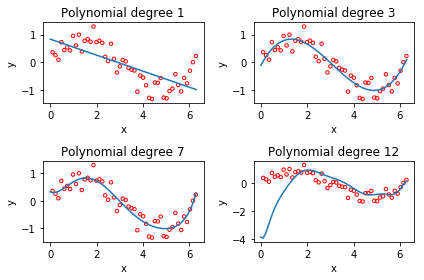

In [32]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [82]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    np.random.shuffle(x)
    print(x)
    np.random.shuffle(y)
    idx = int(ratio*len(x))
    idy = int(ratio*len(y))
    
    x_train, x_test = x[:idx], x[idx:]
    y_train, y_test = y[:idy], y[idy:]
    return x_train, y_train, x_test, y_test

In [83]:
#x = np.random.rand(10, 5)
#ratio = 0.8
#idx = int(ratio * len(x))
#print(int(idx))
#train, test = x[:idx, :], x[idx:, :]
#print(train, "\n\n", test)

print(x)

x_train, y_train, x_test, y_test = split_data(y, x, 0.8)

[6.0308104  4.26418602 1.74043692 2.49756165 3.63324875 4.51656093
 4.8951233  3.12849893 5.90462294 5.52606058 2.6237491  1.99281183
 1.61424946 5.77843549 5.02131076 2.24518674 0.60474982 1.86662437
 5.27368567 1.2356871  4.13799857 2.87612401 0.73093728 0.22618746
 4.64274839 1.48806201 3.25468638 2.37137419 1.10949964 6.28318531
 3.00231147 4.76893584 5.14749821 0.1        4.39037348 1.36187455
 3.7594362  0.35237491 5.39987312 0.47856237 6.15699785 4.01181111
 0.85712473 2.11899928 3.38087384 2.74993656 0.98331219 3.88562366
 3.50706129 5.65224803]
[ 8.33364051e-01  3.88647453e-01 -1.41108000e-04 -8.35127298e-01
  6.67509379e-01 -1.30763072e+00  7.39727694e-01  4.37144573e-01
  2.22695473e-01 -1.06662741e+00 -1.33397556e+00 -1.28027608e+00
 -3.08575746e-01 -4.84226326e-01  3.76102400e-02 -4.37345163e-01
 -9.56348655e-01 -7.46011639e-01  3.05224230e-02  2.52524512e-01
  8.95549970e-02 -5.59911457e-01  1.94693837e-01  3.59152612e-01
  7.77071848e-01  1.28930361e+00  7.22554859e-01 -

Then, test your `split_data` function below.

In [76]:
from costs import compute_mse

def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    print(x)
    x_train, y_train, x_test, y_test = split_data(x, y, ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    #phi_y_train = build_poly(y_train, degree)
    #phi_y_test = build_poly(y_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    print(y_train.shape, "\n\n", phi_x_train)
    weights, mse = least_squares(y_train, phi_x_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*compute_mse(y, phi_x_train, weights))
    rmse_te = np.sqrt(2*compute_mse(y, phi_x_test, weights))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [77]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

[[0.51155062 0.95334719 0.20387944 0.91784853 0.99829947]
 [0.80824543 0.86213737 0.16678099 0.57891717 0.96710671]
 [0.515379   0.85946818 0.4306888  0.35622838 0.98694007]
 [0.45804734 0.24518462 0.4265353  0.76846122 0.03825976]
 [0.48594497 0.44343853 0.08818568 0.1767164  0.83251754]
 [0.40296265 0.51180702 0.27634995 0.56500469 0.7336877 ]
 [0.82582578 0.4981083  0.25322091 0.35664532 0.62591179]
 [0.6259507  0.2991635  0.94492936 0.60307778 0.59573618]
 [0.14703078 0.56694339 0.33205482 0.27886189 0.52154027]
 [0.95061371 0.33027967 0.09376159 0.34129956 0.66207996]]
(45,) 

 [[1.         0.515379   0.85946818 0.4306888  0.35622838 0.98694007]
 [1.         0.95061371 0.33027967 0.09376159 0.34129956 0.66207996]
 [1.         0.82582578 0.4981083  0.25322091 0.35664532 0.62591179]
 [1.         0.48594497 0.44343853 0.08818568 0.1767164  0.83251754]
 [1.         0.51155062 0.95334719 0.20387944 0.91784853 0.99829947]
 [1.         0.45804734 0.24518462 0.4265353  0.76846122 0.038259

ValueError: shapes (6,9) and (45,) not aligned: 9 (dim 1) != 45 (dim 0)

# 3 Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    raise NotImplementedError


In [ ]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)